In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# 📌 Titanic veri setini yükleyelim
df = pd.read_csv("titanic.csv")


In [15]:
# 📌 Veri setinin temel bilgilerini gösterelim
def veri_on_inceleme(df):
    print("📌 İlk 5 Satır:")
    print(df.head())
    print("\n🔎 Veri Setinin Boyutları:", df.shape)
    print("\n📊 Sütunlar ve Veri Türleri:")
    print(df.dtypes)
    print("\n⚠️ Eksik Değerler:")
    print(df.isnull().sum())

veri_on_inceleme(df)


📌 İlk 5 Satır:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [17]:
# 📌 Eksik verileri dolduralım
def eksik_veri_doldur(df):
    df = df.copy()  # DataFrame'in orijinalini korumak için kopyasını al
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Mod ile doldur
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Medyan ile doldur
    df['Cabin'] = df['Cabin'].fillna('Unknown')  # Eksik kabin bilgilerini 'Unknown' ile doldur
    return df

df = eksik_veri_doldur(df)


In [18]:
print("\n✅ Eksik veriler dolduruldu. Güncellenmiş veri seti:")
print(df.isnull().sum())



✅ Eksik veriler dolduruldu. Güncellenmiş veri seti:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [19]:
# 📌 Sayısal sütunlar için temel istatistiksel özet
print("\n📈 Temel İstatistiksel Özet:")
print(df.describe())



📈 Temel İstatistiksel Özet:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [20]:
# 📌 Yaş ve Fiyat arasındaki korelasyon
correlation = df[['Age', 'Fare']].corr()
print("\n🔗 Yaş ve Fiyat Arasındaki Korelasyon:")
print(correlation)



🔗 Yaş ve Fiyat Arasındaki Korelasyon:
           Age      Fare
Age   1.000000  0.096688
Fare  0.096688  1.000000


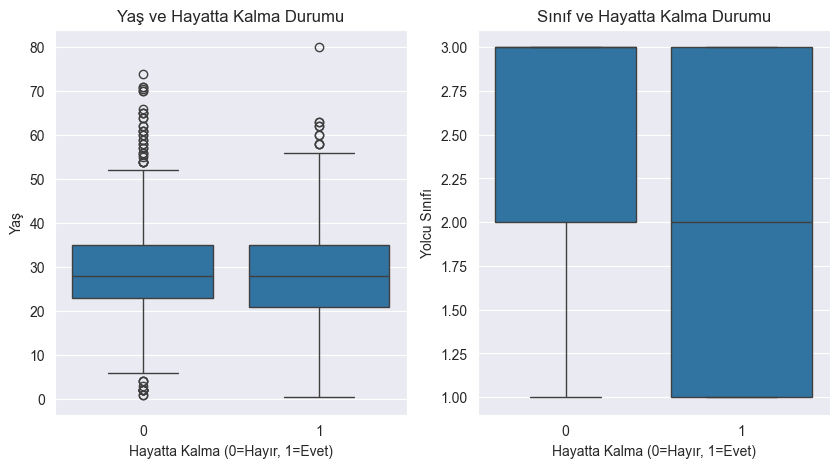

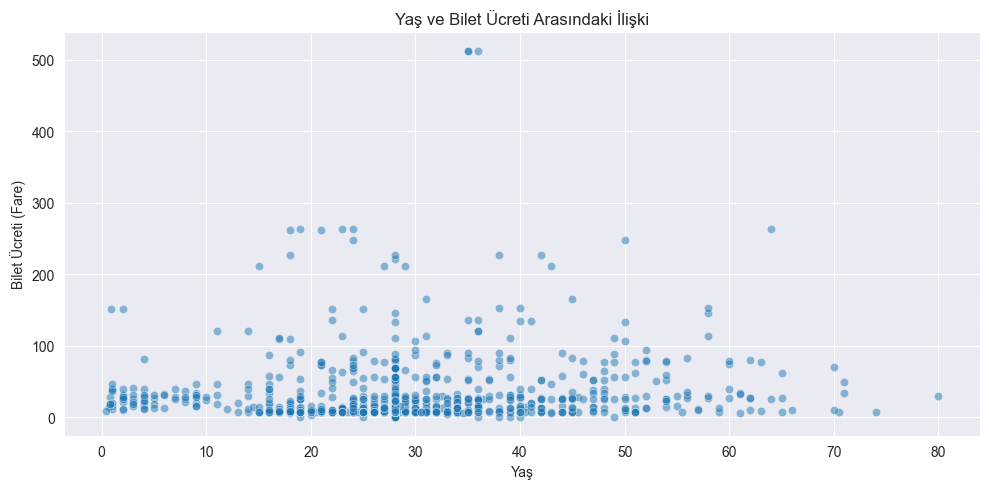

In [22]:
# 📊 Görselleştirmeler
def grafik_ciz():
    plt.figure(figsize=(10, 5))
    
    # Hayatta kalma ve yaş ilişkisi
    plt.subplot(1, 2, 1)
    sns.boxplot(x="Survived", y="Age", data=df)
    plt.title('Yaş ve Hayatta Kalma Durumu')
    plt.xlabel('Hayatta Kalma (0=Hayır, 1=Evet)')
    plt.ylabel('Yaş')
    
    # Pclass ve hayatta kalma ilişkisi
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Survived", y="Pclass", data=df)
    plt.title('Sınıf ve Hayatta Kalma Durumu')
    plt.xlabel('Hayatta Kalma (0=Hayır, 1=Evet)')
    plt.ylabel('Yolcu Sınıfı')

    # Scatter plot (Yaş ve Bilet Ücreti)
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['Age'], y=df['Fare'], alpha=0.5)
    plt.title("Yaş ve Bilet Ücreti Arasındaki İlişki")
    plt.xlabel("Yaş")
    plt.ylabel("Bilet Ücreti (Fare)")


    plt.tight_layout()
    plt.show()

grafik_ciz()

In [23]:
"""
# 📌 Titanic Veri Seti Analizi - Sonuçlar

## 📊 1. Veri Seti Genel Bilgileri
- Veri seti **891 satır** ve **12 sütundan** oluşmaktadır.
- Eksik veriler doldurulduktan sonra analiz daha sağlıklı hale gelmiştir.
- **Eksik veriler:**
  - `Age (Yaş)`: 177 eksik değer → **Medyan ile dolduruldu**.
  - `Cabin (Kabin No)`: 687 eksik değer → **'Unknown' olarak dolduruldu**.
  - `Embarked (Biniş Noktası)`: 2 eksik değer → **Mod ile dolduruldu**.

---

## 📈 2. Hayatta Kalma Oranları
- Genel olarak **hayatta kalma oranı ~%38** iken, **%62’si kurtulamamıştır**.
- **Kadın yolcuların hayatta kalma oranı erkeklerden önemli ölçüde daha yüksektir.**  

---

## 🔗 3. Yaş ve Hayatta Kalma İlişkisi
- **Genç yolcuların hayatta kalma oranı daha yüksektir.**
- Bebek ve çocukların (0-10 yaş) kurtulma şansı **daha fazla**.
- Yaş arttıkça hayatta kalma oranı **azalmaktadır**.

---

## 🎟️ 4. Yolcu Sınıfı (Pclass) ve Hayatta Kalma İlişkisi
- **1. Sınıf yolcuların hayatta kalma oranı (~%62) en yüksektir.**
- **3. Sınıf yolcuların çoğu hayatta kalamamıştır (~%24).**
- **Daha yüksek sınıfta seyahat edenlerin hayatta kalma şansı daha yüksektir.**

---

## 💰 5. Ücret (Fare) ve Hayatta Kalma İlişkisi
- Daha yüksek bilet fiyatı ödeyen yolcuların hayatta kalma olasılığı **daha yüksektir**.
- Özellikle **1. sınıf yolcuların ödediği bilet fiyatları daha yüksektir** ve hayatta kalma oranları daha iyidir.

---

## 🎯 6. Sonuç ve Çıkarımlar
- **Kadınlar ve çocuklar hayatta kalma ihtimali en yüksek olan gruptur.**
- **Ekonomik durum (1. sınıf, daha yüksek ücret ödeyenler) hayatta kalma oranını artırmaktadır.**
- **Düşük gelirli ve 3. sınıf yolcuların hayatta kalma şansı düşüktür.**
- **Yaş arttıkça hayatta kalma oranı düşmektedir.**

👉 **Bu sonuçlar, Titanic faciasında sosyal statü ve cinsiyetin hayatta kalma ihtimalini nasıl etkilediğini göstermektedir.** 🚢⚓
"""

"\n# 📌 Titanic Veri Seti Analizi - Sonuçlar\n\n## 📊 1. Veri Seti Genel Bilgileri\n- Veri seti **891 satır** ve **12 sütundan** oluşmaktadır.\n- Eksik veriler doldurulduktan sonra analiz daha sağlıklı hale gelmiştir.\n- **Eksik veriler:**\n  - `Age (Yaş)`: 177 eksik değer → **Medyan ile dolduruldu**.\n  - `Cabin (Kabin No)`: 687 eksik değer → **'Unknown' olarak dolduruldu**.\n  - `Embarked (Biniş Noktası)`: 2 eksik değer → **Mod ile dolduruldu**.\n\n---\n\n## 📈 2. Hayatta Kalma Oranları\n- Genel olarak **hayatta kalma oranı ~%38** iken, **%62’si kurtulamamıştır**.\n- **Kadın yolcuların hayatta kalma oranı erkeklerden önemli ölçüde daha yüksektir.**  \n\n---\n\n## 🔗 3. Yaş ve Hayatta Kalma İlişkisi\n- **Genç yolcuların hayatta kalma oranı daha yüksektir.**\n- Bebek ve çocukların (0-10 yaş) kurtulma şansı **daha fazla**.\n- Yaş arttıkça hayatta kalma oranı **azalmaktadır**.\n\n---\n\n## 🎟️ 4. Yolcu Sınıfı (Pclass) ve Hayatta Kalma İlişkisi\n- **1. Sınıf yolcuların hayatta kalma oranı (~%6